In [340]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [341]:
df = pd.read_csv(r'D:\Datasets\diabetes.csv')

In [342]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [343]:
from sklearn.model_selection import train_test_split

In [344]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB

In [345]:
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 5)

In [346]:
features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI', 'DiabetesPedigreeFunction','Age']

In [347]:
x_train = df_train[features]

In [348]:
y_train = df_train['Outcome']

In [349]:
x_test = df_test[features]

In [350]:
y_test = df_test['Outcome']

In [351]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
140,3,128,78,0,0,21.1,0.268,55
358,12,88,74,40,54,35.3,0.378,48
143,10,108,66,0,0,32.4,0.272,42
674,8,91,82,0,0,35.6,0.587,68
121,6,111,64,39,0,34.2,0.260,24
...,...,...,...,...,...,...,...,...
73,4,129,86,20,270,35.1,0.231,23
400,4,95,64,0,0,32.0,0.161,31
118,4,97,60,23,0,28.2,0.443,22
701,6,125,78,31,0,27.6,0.565,49


In [352]:
y_test.head()

567    0
123    0
615    0
492    0
288    0
Name: Outcome, dtype: int64

In [353]:
y_test.count()

154

In [354]:
y_train.count()

614

In [355]:
x_train.count()

Pregnancies                 614
Glucose                     614
BloodPressure               614
SkinThickness               614
Insulin                     614
BMI                         614
DiabetesPedigreeFunction    614
Age                         614
dtype: int64

Creating histogram to see how the data is distributed 

<Axes: >

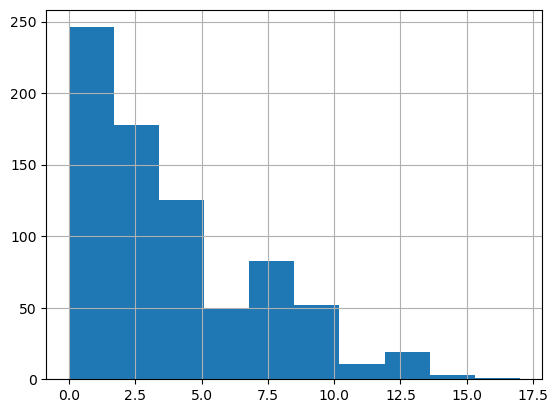

In [356]:
df['Pregnancies'].hist()

<Axes: >

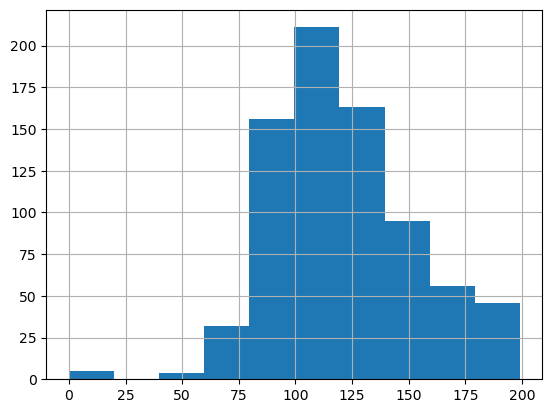

In [357]:
df['Glucose'].hist()

Scatter matrix.
This will show us the scatter plot of every feature versus every other feature inside a matri And along the diagonal, we'll be able to see a histogram for each feature.x.

array([[<Axes: xlabel='Pregnancies', ylabel='Pregnancies'>,
        <Axes: xlabel='Glucose', ylabel='Pregnancies'>,
        <Axes: xlabel='BloodPressure', ylabel='Pregnancies'>,
        <Axes: xlabel='SkinThickness', ylabel='Pregnancies'>,
        <Axes: xlabel='Insulin', ylabel='Pregnancies'>,
        <Axes: xlabel='BMI', ylabel='Pregnancies'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <Axes: xlabel='Age', ylabel='Pregnancies'>,
        <Axes: xlabel='Outcome', ylabel='Pregnancies'>],
       [<Axes: xlabel='Pregnancies', ylabel='Glucose'>,
        <Axes: xlabel='Glucose', ylabel='Glucose'>,
        <Axes: xlabel='BloodPressure', ylabel='Glucose'>,
        <Axes: xlabel='SkinThickness', ylabel='Glucose'>,
        <Axes: xlabel='Insulin', ylabel='Glucose'>,
        <Axes: xlabel='BMI', ylabel='Glucose'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Glucose'>,
        <Axes: xlabel='Age', ylabel='Glucose'>,
        <Axes: xlabel='Outcom

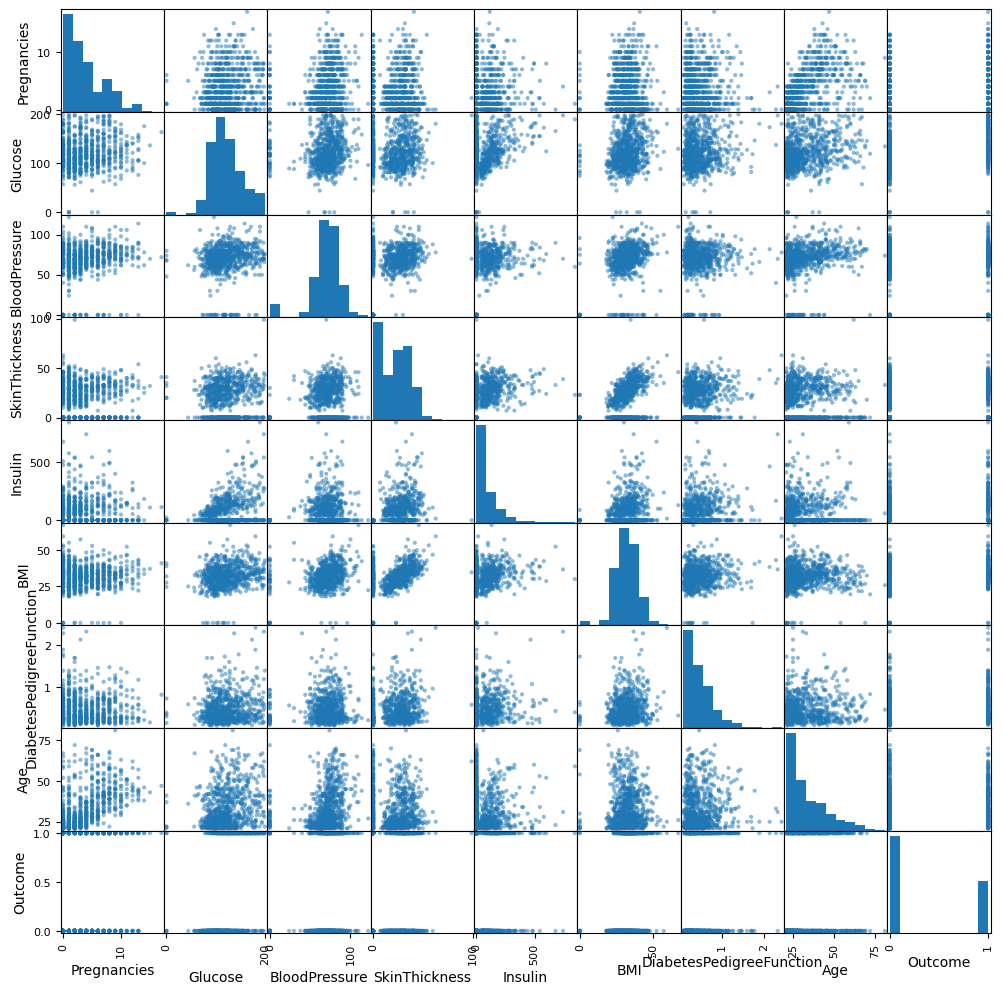

In [358]:
pd.plotting.scatter_matrix (df, figsize = (12,12))

In [359]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


describe()  shows some statistical feature like count , mean, max and avg and so on.

In [360]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [361]:
model = GaussianNB()

In [362]:
model.fit(x_train, y_train)

GaussianNB()

In [363]:
print(" train accuracy : " , model.score(x_train, y_train)) 

 train accuracy :  0.752442996742671


In [364]:
print(" test accuracy : " , model.score(x_test, y_test)) 

 test accuracy :  0.7662337662337663


 For more statistically accurate measure of performance by using cross validation.

In [365]:
x = df[features]

In [366]:
y = df['Outcome']

In [367]:
result = cross_val_score (model, x, y)

In [368]:
result

array([0.75324675, 0.72727273, 0.74675325, 0.78431373, 0.74509804])

In [369]:
result.mean() , result.std()

(0.7513368983957219, 0.018601807594185577)

Some of the data doesn't looking like gaussian distribution so to slove this we are doing Log transfrom. 

In [370]:
np.log(df['Pregnancies'])

C:\Users\DELL\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0      1.791759
1      0.000000
2      2.079442
3      0.000000
4          -inf
         ...   
763    2.302585
764    0.693147
765    1.609438
766    0.000000
767    0.000000
Name: Pregnancies, Length: 768, dtype: float64

To avoid minus infinity or zero with each value adding log1p ( log 1+ )
two ways to do so 

In [371]:
### Apply log1p transformation to each feature (way on 01) 
##df_log_transformed = df.copy()
#for feature in features:
    #df_log_transformed[feature] = np.log1p(df_log_transformed[feature])

# Verify the transformation by printing the first few rows
#print(df_log_transformed.head())

Way on 02:


In [372]:
df['log_Pregnancies'] = np.log1p(df['Pregnancies'])

In [373]:
df['log_Glucose'] = np.log1p(df['Glucose'])
df['log_BloodPressure'] = np.log1p(df['BloodPressure'])
df['log_SkinThickness'] = np.log1p(df['SkinThickness'])


In [374]:
df['log_BMI'] = np.log1p(df['BMI'])
df['log_Insulin'] = np.log1p(df['Insulin'])
df['log_DiabetesPedigreeFunction'] = np.log1p(df['DiabetesPedigreeFunction'])

In [375]:
df['log_DiabetesPedigreeFunction']

0      0.486738
1      0.300845
2      0.514021
3      0.154436
4      1.190279
         ...   
763    0.157858
764    0.292670
765    0.219136
766    0.299364
767    0.273837
Name: log_DiabetesPedigreeFunction, Length: 768, dtype: float64

<Axes: >

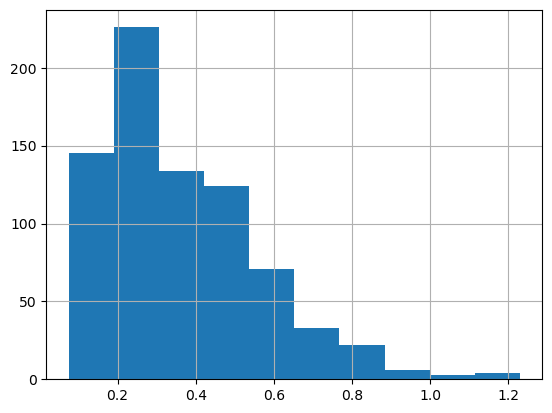

In [376]:
df['log_DiabetesPedigreeFunction'].hist()

<Axes: >

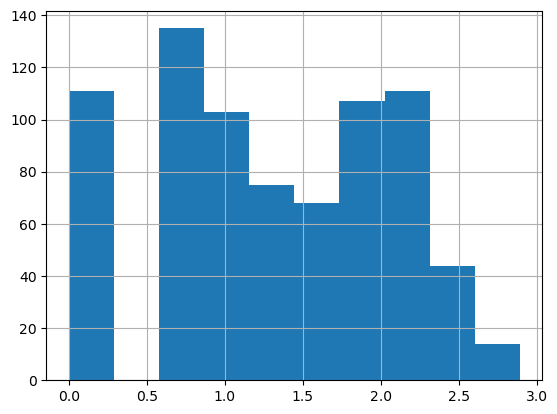

In [377]:
df['log_Pregnancies'].hist()

<Axes: >

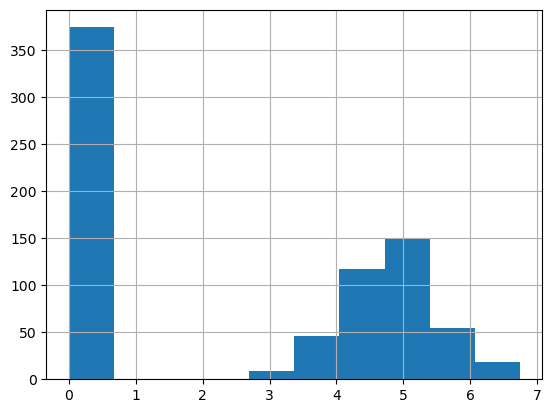

In [378]:
df['log_Insulin'].hist()

<Axes: >

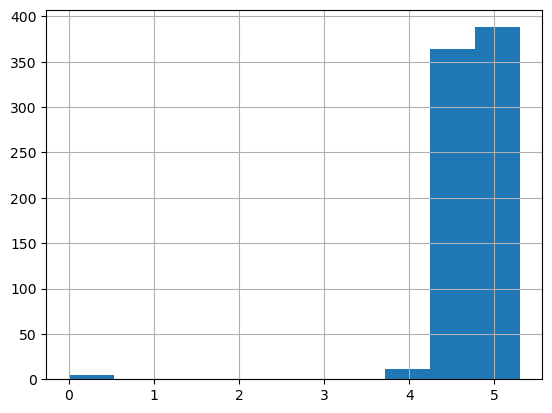

In [379]:
df['log_Glucose'].hist()

<Axes: >

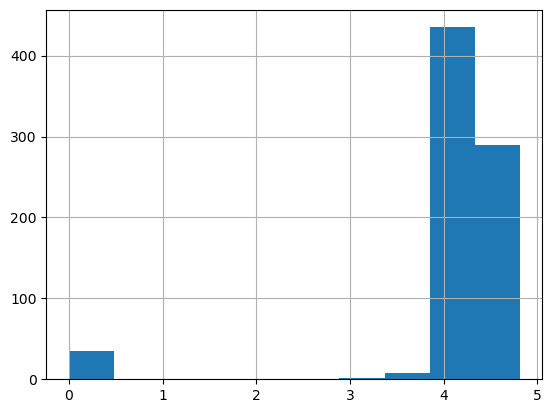

In [380]:
df['log_BloodPressure'].hist()

Try Naive bayes again with new log features 

In [381]:
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 42)

In [382]:
features = [ 'log_Pregnancies','log_Glucose','log_BloodPressure','log_SkinThickness','log_Insulin','log_BMI', 'log_DiabetesPedigreeFunction','Age']

In [383]:
x_train = df_train[features]

In [384]:
y_train = df_train['Outcome']

In [385]:
x_test = df_test[features]

In [386]:
y_test = df_test['Outcome']

In [387]:
model = GaussianNB()

In [388]:
model.fit(x_train, y_train)

GaussianNB()

In [389]:
print("train accuracy : " , model.score(x_train, y_train)) 

train accuracy :  0.7133550488599348


In [390]:
print(" test accuracy : " , model.score(x_test, y_test)) 

 test accuracy :  0.6818181818181818


In [391]:
x = df[features]

In [392]:
y = df['Outcome']

In [393]:
result = cross_val_score (model, x, y)

In [394]:
result

array([0.72727273, 0.70779221, 0.66233766, 0.71895425, 0.73202614])

In [395]:
result.mean() , result.std()

(0.7096765979118921, 0.025058836823970757)

In [396]:
(df['Outcome'] == 1).sum() / df.shape[0]

0.3489583333333333

It shows that only 35 percent of our dataset is 1 that's indicates our dataset is slightly imbalanced. So let's check the other accuracy like binary detection metrics like AUC and F1


In [397]:
result = cross_val_score (model, x, y, scoring = 'roc_auc')

In [398]:
result.mean() , result.std()

(0.7697078965758211, 0.02042715935902065)

In [399]:
result = cross_val_score (model, x, y, scoring = 'f1')

In [400]:
result.mean() , result.std()

(0.5493291385213287, 0.05465176835074137)

TRY TO IMPUTE MISSING DATA

Let's find out how many zeros are there 

In [401]:
np.where(df['Pregnancies']== 0)[0].shape

(111,)

In [402]:
np.where(df['Pregnancies']== 0)

(array([  4,  16,  45,  57,  58,  59,  66,  78,  83, 102, 109, 120, 124,
        129, 136, 137, 138, 145, 162, 164, 177, 181, 200, 202, 211, 213,
        220, 226, 229, 237, 239, 247, 253, 266, 268, 277, 280, 290, 291,
        294, 297, 300, 307, 308, 311, 322, 335, 336, 367, 371, 372, 376,
        379, 381, 397, 407, 414, 422, 426, 428, 435, 440, 445, 447, 448,
        449, 452, 465, 466, 467, 471, 472, 475, 481, 483, 484, 485, 487,
        506, 511, 528, 529, 531, 536, 537, 538, 561, 564, 569, 580, 589,
        595, 596, 608, 619, 623, 626, 627, 631, 640, 647, 649, 677, 681,
        682, 697, 713, 727, 736, 753, 757], dtype=int64),)

In [403]:
np.where(df['BloodPressure']== 0)

(array([  7,  15,  49,  60,  78,  81, 172, 193, 222, 261, 266, 269, 300,
        332, 336, 347, 357, 426, 430, 435, 453, 468, 484, 494, 522, 533,
        535, 589, 601, 604, 619, 643, 697, 703, 706], dtype=int64),)

In [404]:
np.where(df['Glucose']== 0)
np.where(df['SkinThickness']== 0)
np.where(df['Age']== 0)
np.where(df['Insulin']== 0)

(array([  0,   1,   2,   5,   7,   9,  10,  11,  12,  15,  17,  21,  22,
         23,  26,  29,  30,  33,  34,  36,  37,  38,  41,  42,  44,  45,
         46,  47,  48,  49,  55,  58,  60,  61,  62,  64,  65,  66,  67,
         72,  74,  75,  76,  77,  78,  79,  80,  81,  83,  84,  86,  89,
         90,  93,  96, 100, 101, 102, 104, 106, 113, 115, 116, 117, 118,
        121, 123, 124, 129, 131, 133, 138, 140, 141, 143, 145, 146, 148,
        149, 151, 154, 155, 160, 163, 164, 166, 167, 168, 170, 172, 176,
        178, 179, 180, 183, 184, 185, 190, 192, 193, 194, 196, 200, 201,
        202, 205, 207, 209, 210, 211, 212, 218, 219, 221, 222, 226, 227,
        230, 233, 235, 237, 238, 239, 240, 242, 245, 246, 249, 250, 251,
        253, 255, 256, 257, 261, 262, 263, 264, 266, 267, 268, 269, 270,
        272, 274, 276, 278, 280, 283, 284, 294, 299, 300, 303, 304, 310,
        314, 317, 319, 321, 322, 324, 327, 330, 332, 333, 336, 337, 339,
        342, 343, 344, 347, 349, 350, 351, 352, 354

In [405]:
np.where(df['Glucose']== 0)[0].shape
np.where(df['SkinThickness']== 0)[0].shape
np.where(df['Age']== 0)[0].shape
np.where(df['Insulin']== 0)[0].shape

(374,)

So the next step is to drop columns associated with insulin and skin thickness.

This is because these columns had so many missing values.

We can't remove these rows since we'd end up removing a majority of the data sets.

As such, we'll just remove those features.

In [406]:
# Drop the specified columns from the DataFrame
df2 = df.drop(columns=['Insulin', 'SkinThickness', 'log_SkinThickness', 'log_Insulin'])


In [407]:
df2 = df2[df2['Glucose'] != 0]

In [408]:
df2 = df2[df2['BMI'] != 0]

In [409]:
df2 = df2[df2['BloodPressure'] != 0]

In [410]:
features = [ 'log_Pregnancies', 'Glucose', 'BloodPressure',
           'BMI',
            'log_DiabetesPedigreeFunction','Age']

In [411]:
df_train, df_test = train_test_split(df2, test_size = 0.2, random_state = 42)

In [412]:
x_train = df_train[features]

In [413]:
y_train = df_train['Outcome']
x_test = df_test[features]
y_test = df_test['Outcome']

In [414]:
model = GaussianNB()
model.fit(x_train, y_train)
print("train accuracy : " , model.score(x_train, y_train)) 
print(" test accuracy : " , model.score(x_test, y_test)) 

train accuracy :  0.7564766839378239
 test accuracy :  0.8


In [415]:
x= df2 [features]

In [416]:
y = df2 ['Outcome']

In [417]:
result = cross_val_score ( model, x,y )

In [418]:
result 

array([0.75862069, 0.73793103, 0.75862069, 0.7862069 , 0.79166667])

In [419]:
result.mean(), result.std()

(0.7666091954022989, 0.019809170191492583)

Firstly, it might not be a great idea to remove rows because we're removing useful data points.

It also might not be a good idea to remove columns because we're removing useful features.

As you recall, we removed insulin, which is a very important thing when it comes to diabetes.

So removing it is not ideal and alternative to removing data is to impute the data or in other words,

fill in the missing values.

we'll use the simple strategy of using the mean for that feature.

In [420]:
df3 = df.copy()

In [421]:
features = [ 'log_Pregnancies','Glucose','BloodPressure','log_SkinThickness','log_Insulin','BMI', 'log_DiabetesPedigreeFunction','Age']

In [422]:
df_train, df_test = train_test_split(df3, test_size = 0.2, random_state = 42)

In [423]:
m = df_train[df_train['Glucose'] != 0]['Glucose'].mean()

In [446]:
df_train.loc[df_train['Glucose'] == 0,'Glucose'] = m

In [445]:
for f in ('Glucose','BloodPressure','log_SkinThickness','log_Insulin','BMI'):
    m = df_train[df_train[f] !=0 ] [f].mean()
    df_train.loc[df_train[f] == 0, f] = m 
    df_test.loc[df_test[f]== 0, f]= m 

In [426]:
x_train = df_train[features]

In [427]:
y_train = df_train['Outcome']
x_test = df_test[features]
y_test = df_test['Outcome']

In [428]:
model = GaussianNB()
model.fit(x_train, y_train)
print("train accuracy : " , model.score(x_train, y_train)) 
print(" test accuracy : " , model.score(x_test, y_test)) 

train accuracy :  0.758957654723127
 test accuracy :  0.7272727272727273


In [429]:
from sklearn.impute import SimpleImputer

In [430]:
from sklearn.pipeline import Pipeline

In [431]:
df4 = df.copy()

In [432]:
cols_w_missing = ['Glucose','BloodPressure', 
                  'log_SkinThickness','log_Insulin','BMI']

In [433]:
for col in cols_w_missing:
    df4.loc[ df4[col] == 0 , col ] = np.nan

In [434]:
x= df4 [features]

In [435]:
y = df4 ['Outcome']

In [436]:
pipe = Pipeline([
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('nb', GaussianNB())
])


In [437]:
result = cross_val_score (pipe, x,y )

In [438]:
result.mean(), result.std()

(0.7539512774806891, 0.018939849374561283)

In [439]:
result = cross_val_score (pipe, x, y, scoring = 'roc_auc')

In [440]:
result.mean(), result.std()

(0.8281348707197764, 0.02384513181084015)

In [441]:
result = cross_val_score (pipe, x, y, scoring = 'f1')

In [444]:
result.mean(), result.std()

(0.6423994503461763, 0.03074516862896126)